In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load the iris dataset
iris = sns.load_dataset("iris")

# Remove species column since clustering is unsupervised
iris_data = iris.drop(columns=["species"])

In [3]:
# Standardize the data
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris_data)

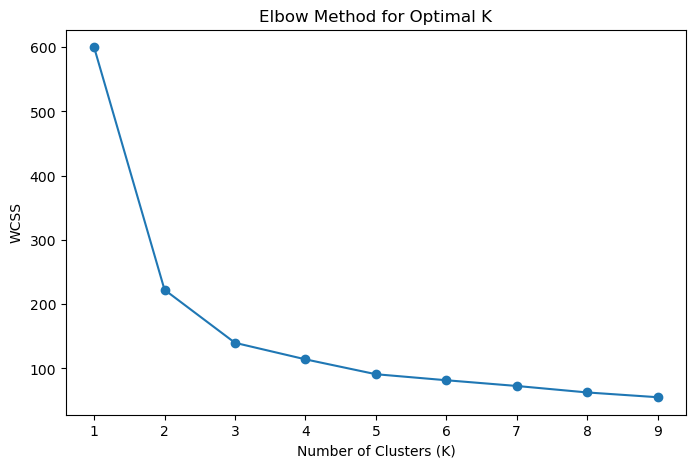

In [4]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_iris)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [5]:
# Apply K-Means with the optimal K (from Elbow Method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
iris_data["Cluster"] = kmeans.fit_predict(scaled_iris)

In [6]:
# Validate clustering with Silhouette Score
silhouette_avg = silhouette_score(scaled_iris, iris_data["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.45994823920518646


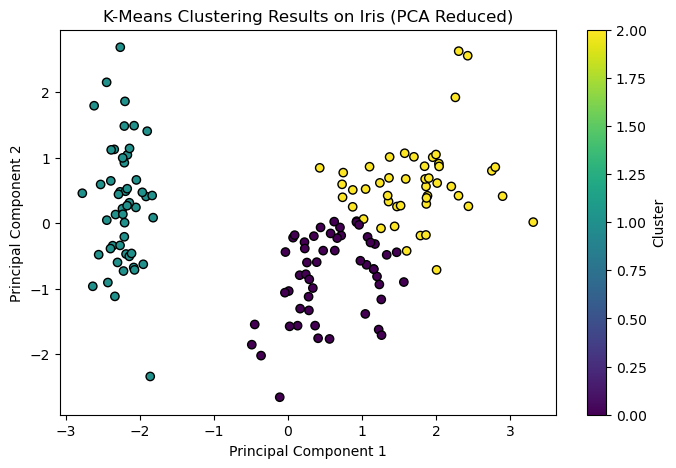

In [7]:
# PCA for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(scaled_iris)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_data["Cluster"], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Results on Iris (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

In [8]:
# Analyze the cluster properties
cluster_means = iris_data.groupby('Cluster').mean()
print(cluster_means)

         sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0            5.801887     2.673585      4.369811     1.413208
1            5.006000     3.428000      1.462000     0.246000
2            6.780851     3.095745      5.510638     1.972340


In [9]:
# Compare clusters to actual species labels
iris["Predicted_Cluster"] = iris_data["Cluster"]
print(iris.groupby(["species", "Predicted_Cluster"]).size())

species     Predicted_Cluster
setosa      1                    50
versicolor  0                    39
            2                    11
virginica   0                    14
            2                    36
dtype: int64
